## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Combine the data into a single dataset
data_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
data_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
timepoints = list(data_df['Timepoint'].unique())
timepoints

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [5]:
mice = list(data_df['Mouse ID'].unique())
mice[0]

'k403'

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_find = data_df[['Mouse ID','Timepoint']].value_counts()>1

dup_m = list()
dup_t = list()

for mouse in mice:
    for time in timepoints:
        try:
            if dup_find[mouse,time]==True:
                dup_m.append(mouse)
                dup_t.append(time)
        except:
            pass
        
print(dup_m)
print(dup_t)

['g989', 'g989', 'g989', 'g989', 'g989']
[0, 5, 10, 15, 20]


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse = data_df.loc[data_df['Mouse ID']==dup_m[0],:].sort_values('Timepoint')
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = data_df.loc[data_df['Mouse ID']!=dup_m[0],:]

In [9]:
# Checking the number of mice in the clean DataFrame.

clean_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [10]:
regimen = list(clean_df['Drug Regimen'].unique())
tumor_vols = dict()
drug_stats = dict()
stat_list = ['mean', 'median', 'var', 'std', 'sem']

for drug in regimen:
    
    # Build a dictionary of tumor volumes for each drug
    
    tumor_vols[drug] = clean_df.loc[clean_df['Drug Regimen'] == drug, ['Tumor Volume (mm3)']]
  
    # Determine summary statistics of tumors for drug
    
    stats = [
            tumor_vols[drug]['Tumor Volume (mm3)'].mean(),
            tumor_vols[drug]['Tumor Volume (mm3)'].median(),
            tumor_vols[drug]['Tumor Volume (mm3)'].var(),
            tumor_vols[drug]['Tumor Volume (mm3)'].std(),
            tumor_vols[drug]['Tumor Volume (mm3)'].sem()
            ]  

    drug_stats[drug] = pd.DataFrame(stats, index=[stat_list])


In [11]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation and SEM of the tumor volume for each regimen

a,b,c,d,e,f,g,h,i,j = regimen

x = a

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Ramicane
mean,40.216745
median,40.673236
var,23.486704
std,4.846308
sem,0.320955


In [12]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = b

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Capomulin
mean,40.675741
median,41.557809
var,24.947764
std,4.994774
sem,0.329346


In [13]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = c

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Infubinol
mean,52.884795
median,51.820584
var,43.128684
std,6.567243
sem,0.492236


In [14]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = d

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Placebo
mean,54.033581
median,52.288934
var,61.168083
std,7.821003
sem,0.581331


In [15]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = e

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Ceftamin
mean,52.591172
median,51.776157
var,39.290177
std,6.268188
sem,0.469821


In [16]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = f

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Stelasyn
mean,54.233149
median,52.431737
var,59.450562
std,7.710419
sem,0.573111


In [17]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = g

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Zoniferol
mean,53.236507
median,51.818479
var,48.533355
std,6.966589
sem,0.516398


In [18]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = h

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Ketapril
mean,55.235638
median,53.698743
var,68.553577
std,8.279709
sem,0.603860


In [19]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = i

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Propriva
mean,52.320930
median,50.446266
var,43.852013
std,6.622085
sem,0.544332


In [20]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

x = j

a_df = pd.DataFrame(drug_stats[x])
a_df = a_df.set_axis([x], axis=1, inplace=False)
a_df

,Naftisol
mean,54.331565
median,52.509285
var,66.173479
std,8.134708
sem,0.596466


In [21]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_group = clean_df.groupby('Drug Regimen')


s1 = clean_group['Tumor Volume (mm3)'].mean()
s2 = clean_group['Tumor Volume (mm3)'].median()
s3 = clean_group['Tumor Volume (mm3)'].var()
s4 = clean_group['Tumor Volume (mm3)'].std()
s5 = clean_group['Tumor Volume (mm3)'].sem()

summary_df = pd.concat([s1,s2,s3,s4,s5],axis=1)
summary_df.columns = ['mean', 'median', 'var', 'std', 'sem']
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# Generate a summary statistics table of 
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_group = clean_df.groupby('Drug Regimen')

stat = ['mean', 'median', 'var', 'std', 'sem']

a = clean_group['Tumor Volume (mm3)'].agg([stat[0]])

b = clean_group['Tumor Volume (mm3)'].agg([stat[1]])

c = clean_group['Tumor Volume (mm3)'].agg([stat[2]])

d = clean_group['Tumor Volume (mm3)'].agg([stat[3]])

e = clean_group['Tumor Volume (mm3)'].agg([stat[4]])

a[stat[0]] = a[stat[0]].map("{:.2f}".format)
b[stat[1]] = b[stat[1]].map("{:.2f}".format)
c[stat[2]] = c[stat[2]].map("{:.2f}".format)
d[stat[3]] = d[stat[3]].map("{:.2f}".format)
e[stat[4]] = e[stat[4]].map("{:.2f}".format)

f = a.join(b)
f = f.join(c)
f = f.join(d)
f = f.join(e)

summary_stat = f.copy()

summary_stat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import numpy as np

cols = clean_df.columns

In [24]:
mouse_g = clean_df.groupby('Drug Regimen')
count   = mouse_g['Timepoint'].count()
count_df = pd.DataFrame(count)

<AxesSubplot:title={'center':'Number of Timepoints Tested for Each Drug Regimen'}, xlabel='Drug Regimen'>

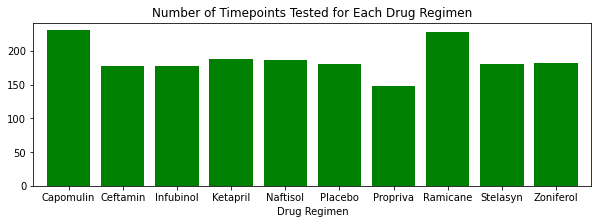

In [25]:
n_count_df = count_df.reset_index()
n_count_df.plot.bar(x='Drug Regimen', y='Timepoint', rot=0, width = .8, color = 'g',
                    figsize=(10, 3), title = "Number of Timepoints Tested for Each Drug Regimen",
                   legend = False)


Text(0.5, 0, 'Drug Regimen')

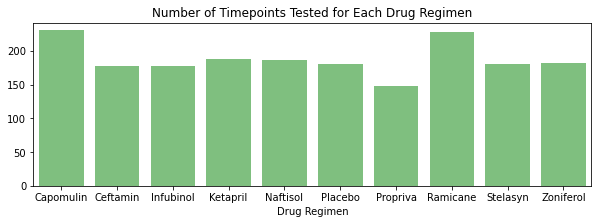

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(count_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, count_df['Timepoint'], color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, count_df.index)
plt.xlim(-.5, len(x_axis)-.5)
plt.title("Number of Timepoints Tested for Each Drug Regimen")
plt.xlabel("Drug Regimen")

<AxesSubplot:title={'center':'Female vs. Male Representation'}, ylabel=' '>

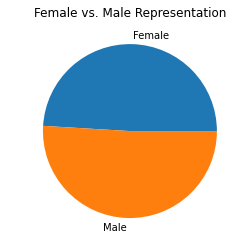

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_g = clean_df.groupby('Sex').count()
sex_df = pd.DataFrame(sex_g)
sex_df = sex_df.rename(columns = {'Timepoint':'Sex'})
sex_df.plot.pie(y = 'Sex', legend = False, title = "Female vs. Male Representation", ylabel=' ')

Text(0.5, 1.0, 'Female vs. Male Representation')

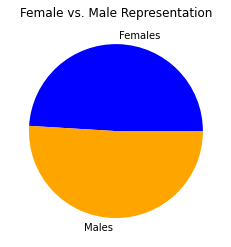

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of pie chart
labels = ['Females','Males']

# The values of each section of the pie chart
sizes = [sex_df['Sex'].iloc[0],sex_df['Sex'].iloc[1]]

# The colors of each section of the pie chart
colors = ["blue","orange"]

plt.figure()
plt.pie(sizes, labels=labels, colors=colors)
plt.title("Female vs. Male Representation")

# Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Group dataframe by mouse and apply function to find max timepoint (tp) in dataframe

timepoint_group = clean_df.groupby('Mouse ID')

# Find max

timepoint_max = timepoint_group['Timepoint'].max()


# Create dataframe

timepoint_df = pd.DataFrame(timepoint_max)
timepoint_df = timepoint_df.reset_index()


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_df = timepoint_df.merge(clean_df, how='left', on=['Mouse ID', 'Timepoint'])
max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [31]:
# Put treatments into a list for for loop 
# (and later for plot labels)
core = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_dict = dict()
vol_list = list()

for drug in core:
    df = max_df.loc[max_df['Drug Regimen'] == drug,['Tumor Volume (mm3)']]
    vol_list = df['Tumor Volume (mm3)'].tolist()
    vol_dict[drug] = vol_list
vol_df = pd.DataFrame(vol_dict)

In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Build quartiles
lower_bound_dict = dict()
upper_bound_dict = dict()

for drug in core:
    quartiles = vol_df[drug].quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print('*******************************************')
    print(f'The IQR Value for {drug} is {iqr:.2f}.')

    # Set bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #building dictionary for dataframe
    lower_bound_dict[drug] = lower_bound
    upper_bound_dict[drug] = upper_bound

    outliers_hi = vol_df.loc[vol_df[drug] > upper_bound,:]
    outliers_lo = vol_df.loc[vol_df[drug] < lower_bound,:]
    outliers = pd.concat([outliers_lo[drug],outliers_hi[drug]])
    print(f'There are {len(outliers)} outliers in {drug} dataset.')
    print('*******************************************')

*******************************************
The IQR Value for Capomulin is 7.78.
There are 0 outliers in Capomulin dataset.
*******************************************
*******************************************
The IQR Value for Ramicane is 9.10.
There are 0 outliers in Ramicane dataset.
*******************************************
*******************************************
The IQR Value for Infubinol is 11.48.
There are 1 outliers in Infubinol dataset.
*******************************************
*******************************************
The IQR Value for Ceftamin is 15.58.
There are 0 outliers in Ceftamin dataset.
*******************************************


In [33]:
# Build dataframe for potential outliers 
# PART 1

filter_df = max_df[max_df['Drug Regimen'] == core[0]]

outliers_hi0 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            > upper_bound_dict[core[0]]]

outliers_lo0 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            < lower_bound_dict[core[0]]]

In [34]:
# Build dataframe for potential outliers
# PART 2

filter_df = max_df[max_df['Drug Regimen'] == core[1]]

outliers_hi1 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            > upper_bound_dict[core[1]]]

outliers_lo1 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            < lower_bound_dict[core[1]]]

In [35]:
# Build dataframe for potential outliers
# PART 3

filter_df = max_df[max_df['Drug Regimen'] == core[2]]

outliers_hi2 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            > upper_bound_dict[core[2]]]

outliers_lo2 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            < lower_bound_dict[core[2]]]

In [36]:
# Build dataframe for potential outliers
# PART 4

filter_df = max_df[max_df['Drug Regimen'] == core[3]]

outliers_hi3 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            > upper_bound_dict[core[3]]]

outliers_lo3 = filter_df.loc[filter_df['Tumor Volume (mm3)']
                            < lower_bound_dict[core[3]]]

In [37]:
# Assemble

outliers_hi = pd.concat([outliers_hi0,outliers_hi1,outliers_hi2,outliers_hi3])
outliers_lo = pd.concat([outliers_lo0,outliers_lo1,outliers_lo2,outliers_lo3])

In [38]:
# High end outliers
outliers_hi

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [39]:
# Low end outliers

outliers_lo

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


In [40]:
    # Locate the rows which contain mice on each drug and get the tumor volumes

Capomulin_vol_df = max_df.loc[max_df['Drug Regimen'] == core[0],['Drug Regimen','Tumor Volume (mm3)']]
Ramicane_vol_df = max_df.loc[max_df['Drug Regimen'] == core[1],['Drug Regimen','Tumor Volume (mm3)']]
Infubinol_vol_df = max_df.loc[max_df['Drug Regimen'] == core[2],['Drug Regimen','Tumor Volume (mm3)']]
Ceftamin_vol_df = max_df.loc[max_df['Drug Regimen'] == core[3],['Drug Regimen','Tumor Volume (mm3)']]

    # add subset 
    
vol_subset = pd.concat([Capomulin_vol_df,Ramicane_vol_df,Infubinol_vol_df,Ceftamin_vol_df])
vol_subset

,Drug Regimen,Tumor Volume (mm3)
19,Capomulin,38.982878
24,Capomulin,38.939633
61,Capomulin,30.485985
64,Capomulin,37.074024
66,Capomulin,40.159220
...,...,...
223,Ceftamin,45.000000
228,Ceftamin,64.634949
231,Ceftamin,61.386660
238,Ceftamin,68.594745


In [41]:
    # Determine outliers using lower bounds

Capomulin_lb = Capomulin_vol_df.loc[Capomulin_vol_df['Tumor Volume (mm3)'] < lower_bound_dict[core[0]]]
Ramicane_lb = Ramicane_vol_df.loc[Ramicane_vol_df['Tumor Volume (mm3)'] < lower_bound_dict[core[1]]]
Infubinol_lb = Infubinol_vol_df.loc[Infubinol_vol_df['Tumor Volume (mm3)'] < lower_bound_dict[core[2]]]
Ceftamin_lb =  Ceftamin_vol_df.loc[Ceftamin_vol_df['Tumor Volume (mm3)'] < lower_bound_dict[core[3]]]

lower_bound_subset = pd.concat([Capomulin_lb,Ramicane_lb,Infubinol_lb,Ceftamin_lb])
lower_bound_subset

,Drug Regimen,Tumor Volume (mm3)
31,Infubinol,36.321346


In [42]:
    # Determine outliers using upper bounds

Capomulin_ub = Capomulin_vol_df.loc[Capomulin_vol_df['Tumor Volume (mm3)'] > upper_bound_dict[core[0]]]
Ramicane_ub = Ramicane_vol_df.loc[Ramicane_vol_df['Tumor Volume (mm3)'] > upper_bound_dict[core[1]]]
Infubinol_ub = Infubinol_vol_df.loc[Infubinol_vol_df['Tumor Volume (mm3)'] > upper_bound_dict[core[2]]]
Ceftamin_ub =  Ceftamin_vol_df.loc[Ceftamin_vol_df['Tumor Volume (mm3)'] > upper_bound_dict[core[3]]]

upper_bound_subset = pd.concat([Capomulin_ub,Ramicane_ub,Infubinol_ub,Ceftamin_ub])
upper_bound_subset

,Drug Regimen,Tumor Volume (mm3)


<AxesSubplot:title={'center':'Tumor Vol of Core Regimen'}>

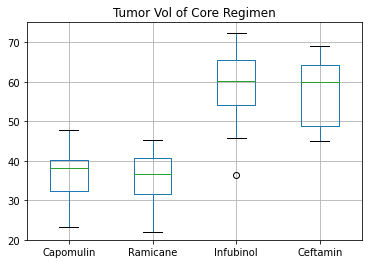

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
ax.set_title('Tumor Vol of Core Regimen')
ax.set_ylim([20, 75])

vol_df.boxplot()

## Line and Scatter Plots

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mouse = Capomulin_df.iloc[0,0]
mouse

's185'

In [45]:
mouse_df = Capomulin_df[Capomulin_df['Mouse ID'] == mouse]
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


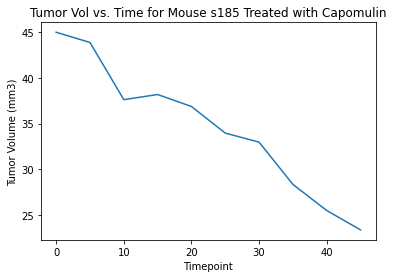

In [46]:
timepoint = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']

plt.title(f'Tumor Vol vs. Time for Mouse {mouse} Treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(timepoint, y_axis)

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Gather mean data

Capomulin_mean = Capomulin_df.groupby('Mouse ID').mean()

Capomulin_mean.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


<IPython.core.display.Javascript object>


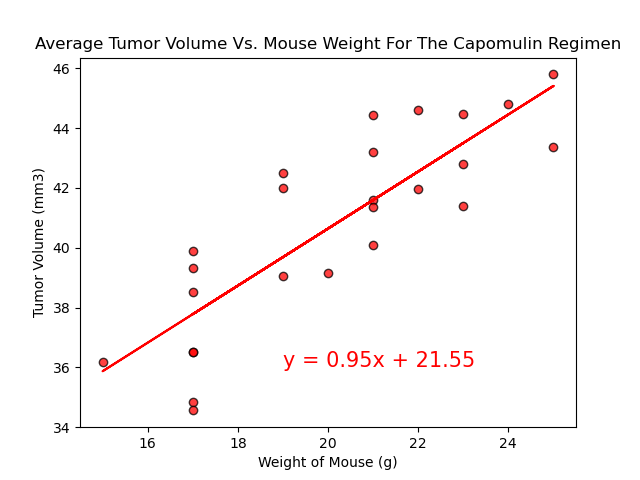

In [48]:
%matplotlib notebook

weight = Capomulin_mean['Weight (g)']
avg_tumorvol = Capomulin_mean['Tumor Volume (mm3)']

Title2 = 'average tumor volume vs. mouse weight for the Capomulin regimen'.title()
plt.title(Title2)
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, avg_tumorvol, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,avg_tumorvol)
print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

The correlation between weight and tumor volume is 0.84


In [50]:
from scipy.stats import linregress

# Calculating line regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumorvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(weight, regress_values,'r-')
plt.annotate(line_eq,(19,36),fontsize=15,color="red")

Text(19, 36, 'y = 0.95x + 21.55')